<a href="https://colab.research.google.com/github/Nodis6/Coffee-regression/blob/main/Project_Norbert_Luzynski_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this regression project is to predict the total cup points. We use this estimate to evaluate beans and classify them as specialty coffees.

In [ ]:
from typing_extensions import DefaultDict
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
import numpy as np
import seaborn
np.random.seed(1)

# Uploading dataset and preprocesisng

Importing a set using github account

In [ ]:
pd.set_option('display.max_columns', None)
# pd.reset_option('max_columns')
df  = pd.read_csv('https://raw.githubusercontent.com/Nodis6/Nodis6/main/merged_data_cleaned.csv')

Checking how the set looks like

In [ ]:
df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
np.shape(df)

(1339, 44)

We see the set has 1339 rows and 44 columns. However we see several columns like Lot.Number, Number.of.Bags, Bag.Weight will not be helpful. So before we delete missing values we must drop unused columns.
We will make attempts to predict Total.Cup.Points	which is sum of valus in columns from Aroma to Cupper.Points.

Also it is worth to notice we must handle with lack of data. Later we will use one hot encoding. Therefore ammount of columns will rapidly increase. Using my own experience (and previous attempts of making models) I wil choose proper columns for further analysis.
We must balance ammount of features to have them less than the samples in rows.

## Dropping columns

We notice that for example in columns Owner and owner1 are doubled. Therefore we should drop one. Firstly We check percentage of NaN values.


In [ ]:
sum = df.isnull().sum()
tot = len(df['Species'])
print(sum/tot * 100)

Unnamed: 0                0.000000
Species                   0.000000
Owner                     0.522778
Country.of.Origin         0.074683
Farm.Name                26.811053
Lot.Number               79.387603
Mill                     23.749066
ICO.Number               11.725168
Company                  15.608663
Altitude                 16.878267
Region                    4.406273
Producer                 17.326363
Number.of.Bags            0.000000
Bag.Weight                0.000000
In.Country.Partner        0.000000
Harvest.Year              3.510082
Grading.Date              0.000000
Owner.1                   0.522778
Variety                  16.878267
Processing.Method        12.696042
Aroma                     0.000000
Flavor                    0.000000
Aftertaste                0.000000
Acidity                   0.000000
Body                      0.000000
Balance                   0.000000
Uniformity                0.000000
Clean.Cup                 0.000000
Sweetness           

We see that a lot of columns have NaN values. So we decide to remove ones with the biggest percentage e.g. Variety, Color. However we leave numerical values.

But firstly let's analise Variety for each country.

In [ ]:
unique_values = df['Country.of.Origin'].unique()

for country in unique_values:
    result = df[df['Country.of.Origin'] == country]['Variety'].value_counts()
    print(f"Country: {country}")
    for variety, count in result.items():
        print(f"  {variety}: {count}")
    print()


Country: Ethiopia
  Other: 8
  Ethiopian Yirgacheffe: 2
  Gesha: 2
  Caturra: 1
  Typica: 1
  Ethiopian Heirlooms: 1

Country: Guatemala
  Bourbon: 119
  Caturra: 29
  Catuai: 9
  Other: 8
  Pacas: 6
  Pacamara: 2

Country: Brazil
  Bourbon: 41
  Yellow Bourbon: 32
  Mundo Novo: 20
  Catuai: 19
  Arusha: 2
  Moka Peaberry: 1

Country: Peru
  Other: 1
  Typica: 1
  Caturra: 1

Country: United States
  Other: 7
  Pache Comun: 1
  Arusha: 1

Country: United States (Hawaii)
  Hawaiian Kona: 44
  Peaberry: 1
  Arusha: 1

Country: Indonesia
  Other: 4
  Mandheling: 3
  Typica: 3
  Java: 2
  Sumatra: 2
  Sumatra Lintong: 1
  Sulawesi: 1
  Bourbon: 1

Country: China
  Catimor: 12
  Other: 2
  Typica: 2

Country: Costa Rica
  Caturra: 28
  Catuai: 15
  Other: 1
  Bourbon: 1

Country: Mexico
  Typica: 137
  Bourbon: 35
  Caturra: 19
  Other: 14
  Mundo Novo: 12
  Pacamara: 6
  Catuai: 4
  Pacas: 1
  Blue Mountain: 1
  Marigojipe: 1

Country: Uganda
  SL14: 17
  Other: 5
  Bourbon: 3

Country: Ho

From previous considerations, I know that taking "Variety" as a variable give worse results than when we delete it. This may make sense because varieties in different countries are often repeated. The second advantage of rejecting "Variety" is the reduction in the number of columns after using One Hot Encoding.

In [ ]:
print(df.keys())

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


In [ ]:
col_to_drop = ['Unnamed: 0',
               'Owner',
               'Farm.Name', 'Lot.Number',
               'Lot.Number', 'Mill', 'ICO.Number',
               'Company',
               'Altitude',
               'Region',
               'Producer',
               'Number.of.Bags', 'Bag.Weight',
               'In.Country.Partner',
               'Harvest.Year', 'Grading.Date', 'Owner.1',
            'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
            'Expiration', 'Certification.Body',
            'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
               'Color',
               'Variety'
               ]

df = df.drop(col_to_drop, axis = 1)
columns = list(df.columns)
columns = columns.remove("Total.Cup.Points")
np.shape(df)

(1339, 11)

In [ ]:
df.head()

,Species,Country.of.Origin,Processing.Method,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
1,Arabica,Ethiopia,Washed / Wet,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
2,Arabica,Guatemala,NaN,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
3,Arabica,Ethiopia,Natural / Dry,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
4,Arabica,Ethiopia,Washed / Wet,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


We have only 11 columns left which is better in this case. Now let's look for missing values.



In [ ]:
df.isnull().sum()  # using the isnull method to return a DataFrame with Boolen values that indicate whether a cell contains a numeric values (False) or if data is missing (True)
                   # using the sum method to return the number of missing values per column

Species                   0
Country.of.Origin         1
Processing.Method       170
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Category.Two.Defects      0
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
dtype: int64

We see that there is some missings in the data set. We can wonder how to deal with this problem. Surely for altitude we must delete NaNs, because every country and even region has different altitude. For the rest columns I consider two approaches: also drop NaN or replace missings by most common value. Because we have access to other records with similar characteristics (country of origin is often closely related with Processing method), we may use them to fill in missing values.

However after I tried replacing with the most common value, the results were worse than removing the missing data. However, I leave this part of the code to show another possible approach.

## The most common value approach

I chose not to use this method because it gave worse outputs. However, I have left it in the code to demonstrate an alternative approach to handle with null values.

In [ ]:
# unique_values = df['Country.of.Origin'].unique().tolist() # making a list woth unique values in column Country.of.Origin
# print("Unique values in Column1 as a list:", unique_values) #printing it
# unique_values = ['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States', 'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica', \
#                  'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua', 'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia', 'Panama',\
#                  'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador', 'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam', 'Philippines', \
#                  'Rwanda', 'Malawi', 'Laos', 'Zambia','Myanmar', 'Cote d?Ivoire', 'India'] # defining a list

In [ ]:
# result = df[df['Country.of.Origin'] == 'Guatemala']['Processing.Method'].value_counts()
# print(result)

In [ ]:
# for country in unique_values:
#     most_common_value = df[df['Country.of.Origin'] == country]['Processing.Method'].mode()[0] # looking for most common Processing Method
#     df.loc[df['Country.of.Origin'] == country, 'Processing.Method'] = df.loc[df['Country.of.Origin'] == country, 'Processing.Method'].fillna(most_common_value) # replacing with most common value

In [ ]:
# result = df[df['Country.of.Origin'] == 'Guatemala']['Processing.Method'].value_counts()
# print(result)

## Dropping missing values

To deal with missings in dataset we will drop rows that contain them.

In [ ]:
df = df.dropna(axis = 0)

Let's see how the numerical data looks like

In [ ]:
df.describe()

,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,82.114209,0.094674,0.391304,0.148221,3.692688,1795.324412,1832.733677,1814.029044
std,2.627590,0.043703,1.930300,0.752028,5.425279,9073.352061,9072.004731,9072.455672
min,59.830000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,81.170000,0.100000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,82.420000,0.110000,0.000000,0.000000,2.000000,1310.640000,1310.640000,1310.640000
75%,83.580000,0.120000,0.000000,0.000000,5.000000,1557.000000,1600.000000,1600.000000
max,90.580000,0.170000,31.000000,11.000000,47.000000,190164.000000,190164.000000,190164.000000


We must handle with outliers in altitude columns.

<Axes: ylabel='altitude_mean_meters'>

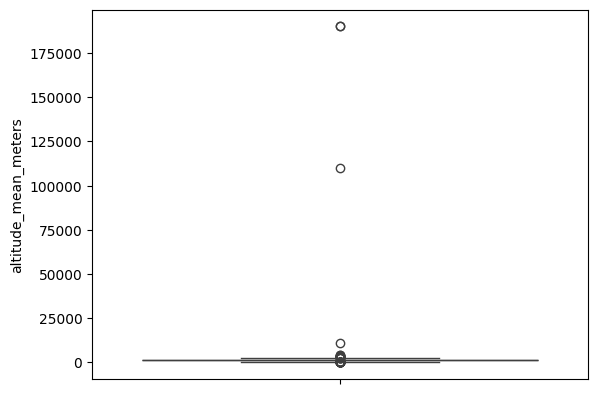

In [ ]:
seaborn.boxplot(data = df, y = 'altitude_mean_meters')

In [ ]:
df.loc[df['altitude_mean_meters'] >10000]

,Species,Country.of.Origin,Processing.Method,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
543,Arabica,Brazil,Semi-washed / Semi-pulped,82.92,0.11,0,0.0,16,11000.0,11000.0,11000.0
896,Arabica,Guatemala,Washed / Wet,81.58,0.12,0,0.0,0,190164.0,190164.0,190164.0
1040,Arabica,Nicaragua,Washed / Wet,80.75,0.12,0,0.0,5,110000.0,110000.0,110000.0
1144,Arabica,Guatemala,Washed / Wet,79.75,0.10,0,4.0,1,190164.0,190164.0,190164.0


Altitude in row 543 and 1040 looks like it is scaled. So we could devide it to obtain logical values. However the other two values look strange, so we will remove them.
After a few tests hemoving all these rows gives the best outcomes.

In [ ]:
# df.loc[543,"altitude_mean_meters"] /= 10
# df.loc[543,"altitude_low_meters"] /= 10
# df.loc[543,"altitude_high_meters"] /= 10

# df.loc[1040,"altitude_mean_meters"] /= 100
# df.loc[1040,"altitude_low_meters"] /= 100
# df.loc[1040,"altitude_high_meters"] /= 100

In [ ]:
df = df[~(df["altitude_low_meters"] > 10000)] # drop altitude bigger than 10000
df = df[~(df["altitude_low_meters"] < 600)] # drop altitude lower than 600

df = df[~(df["altitude_mean_meters"] > 10000)] # drop altitude bigger than 10000
df = df[~(df["altitude_mean_meters"] < 600)] # drop altitude lower than 600

df = df[~(df["altitude_high_meters"] > 10000)] # drop altitude bigger than 10000
df = df[~(df["altitude_high_meters"] < 600)] # drop altitude lower than 600

Now we take a look at Total cup points but it looks quite decent.

<Axes: xlabel='Species', ylabel='Total.Cup.Points'>

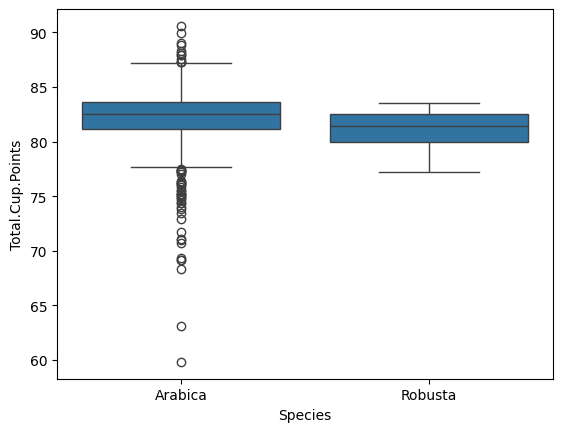

In [ ]:
seaborn.boxplot(data = df, x="Species", y="Total.Cup.Points")

In [ ]:
# df = df[~(df["Total.Cup.Points"] <=10)] # if everythig went well we do not need it

In [ ]:
df.describe()

,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,82.130624,0.095803,0.345666,0.143763,3.783298,1376.175101,1410.985012,1393.580057
std,2.648039,0.042581,1.675206,0.742118,5.406695,399.452666,416.582059,404.522205
min,59.830000,0.000000,0.000000,0.000000,0.000000,600.000000,600.000000,600.000000
25%,81.170000,0.100000,0.000000,0.000000,0.000000,1172.500000,1200.000000,1200.000000
50%,82.500000,0.110000,0.000000,0.000000,2.000000,1313.820000,1353.332400,1350.000000
75%,83.580000,0.120000,0.000000,0.000000,5.000000,1600.000000,1650.000000,1600.000000
max,90.580000,0.170000,31.000000,11.000000,47.000000,4287.000000,4287.000000,4287.000000


# Data visualisation

A histogram of Total cup points.

<Axes: >

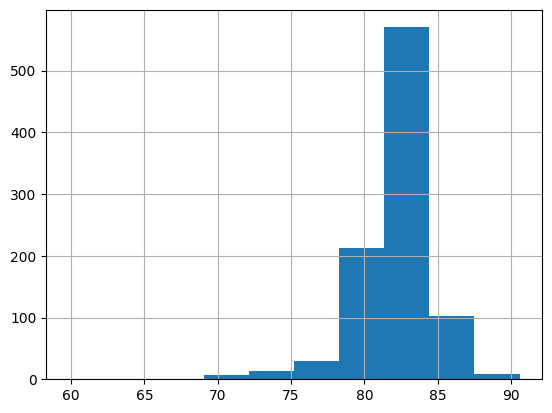

In [ ]:
df['Total.Cup.Points'].hist()

Heatmap for numerical data.

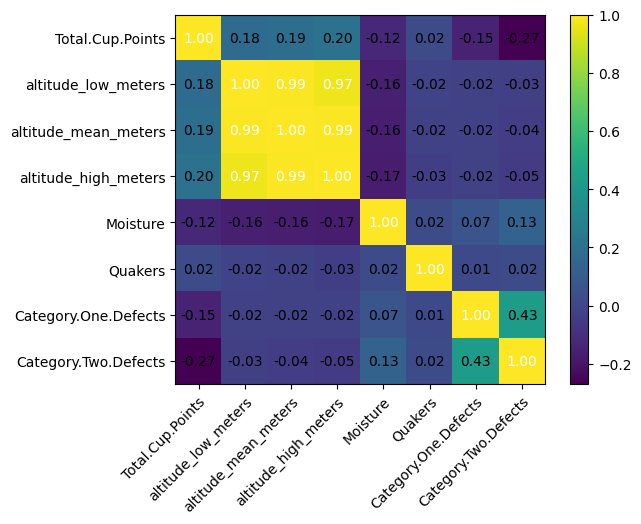

In [ ]:
cols = ['Total.Cup.Points',
        'altitude_low_meters',
        'altitude_mean_meters',
        'altitude_high_meters',
        'Moisture',
        'Quakers',
        'Category.One.Defects',
        'Category.Two.Defects'
        ]
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm,  row_names=cols,  column_names=cols)
plt.show()

We can see that Quakers column is not high correlated with other columns. However model works better with it but why. Quakers may have a big impact at a coffee bag. Quaker coffee is the term used for a faulty – most commonly under ripe – coffee bean, it tastes extremely dry and sharp.

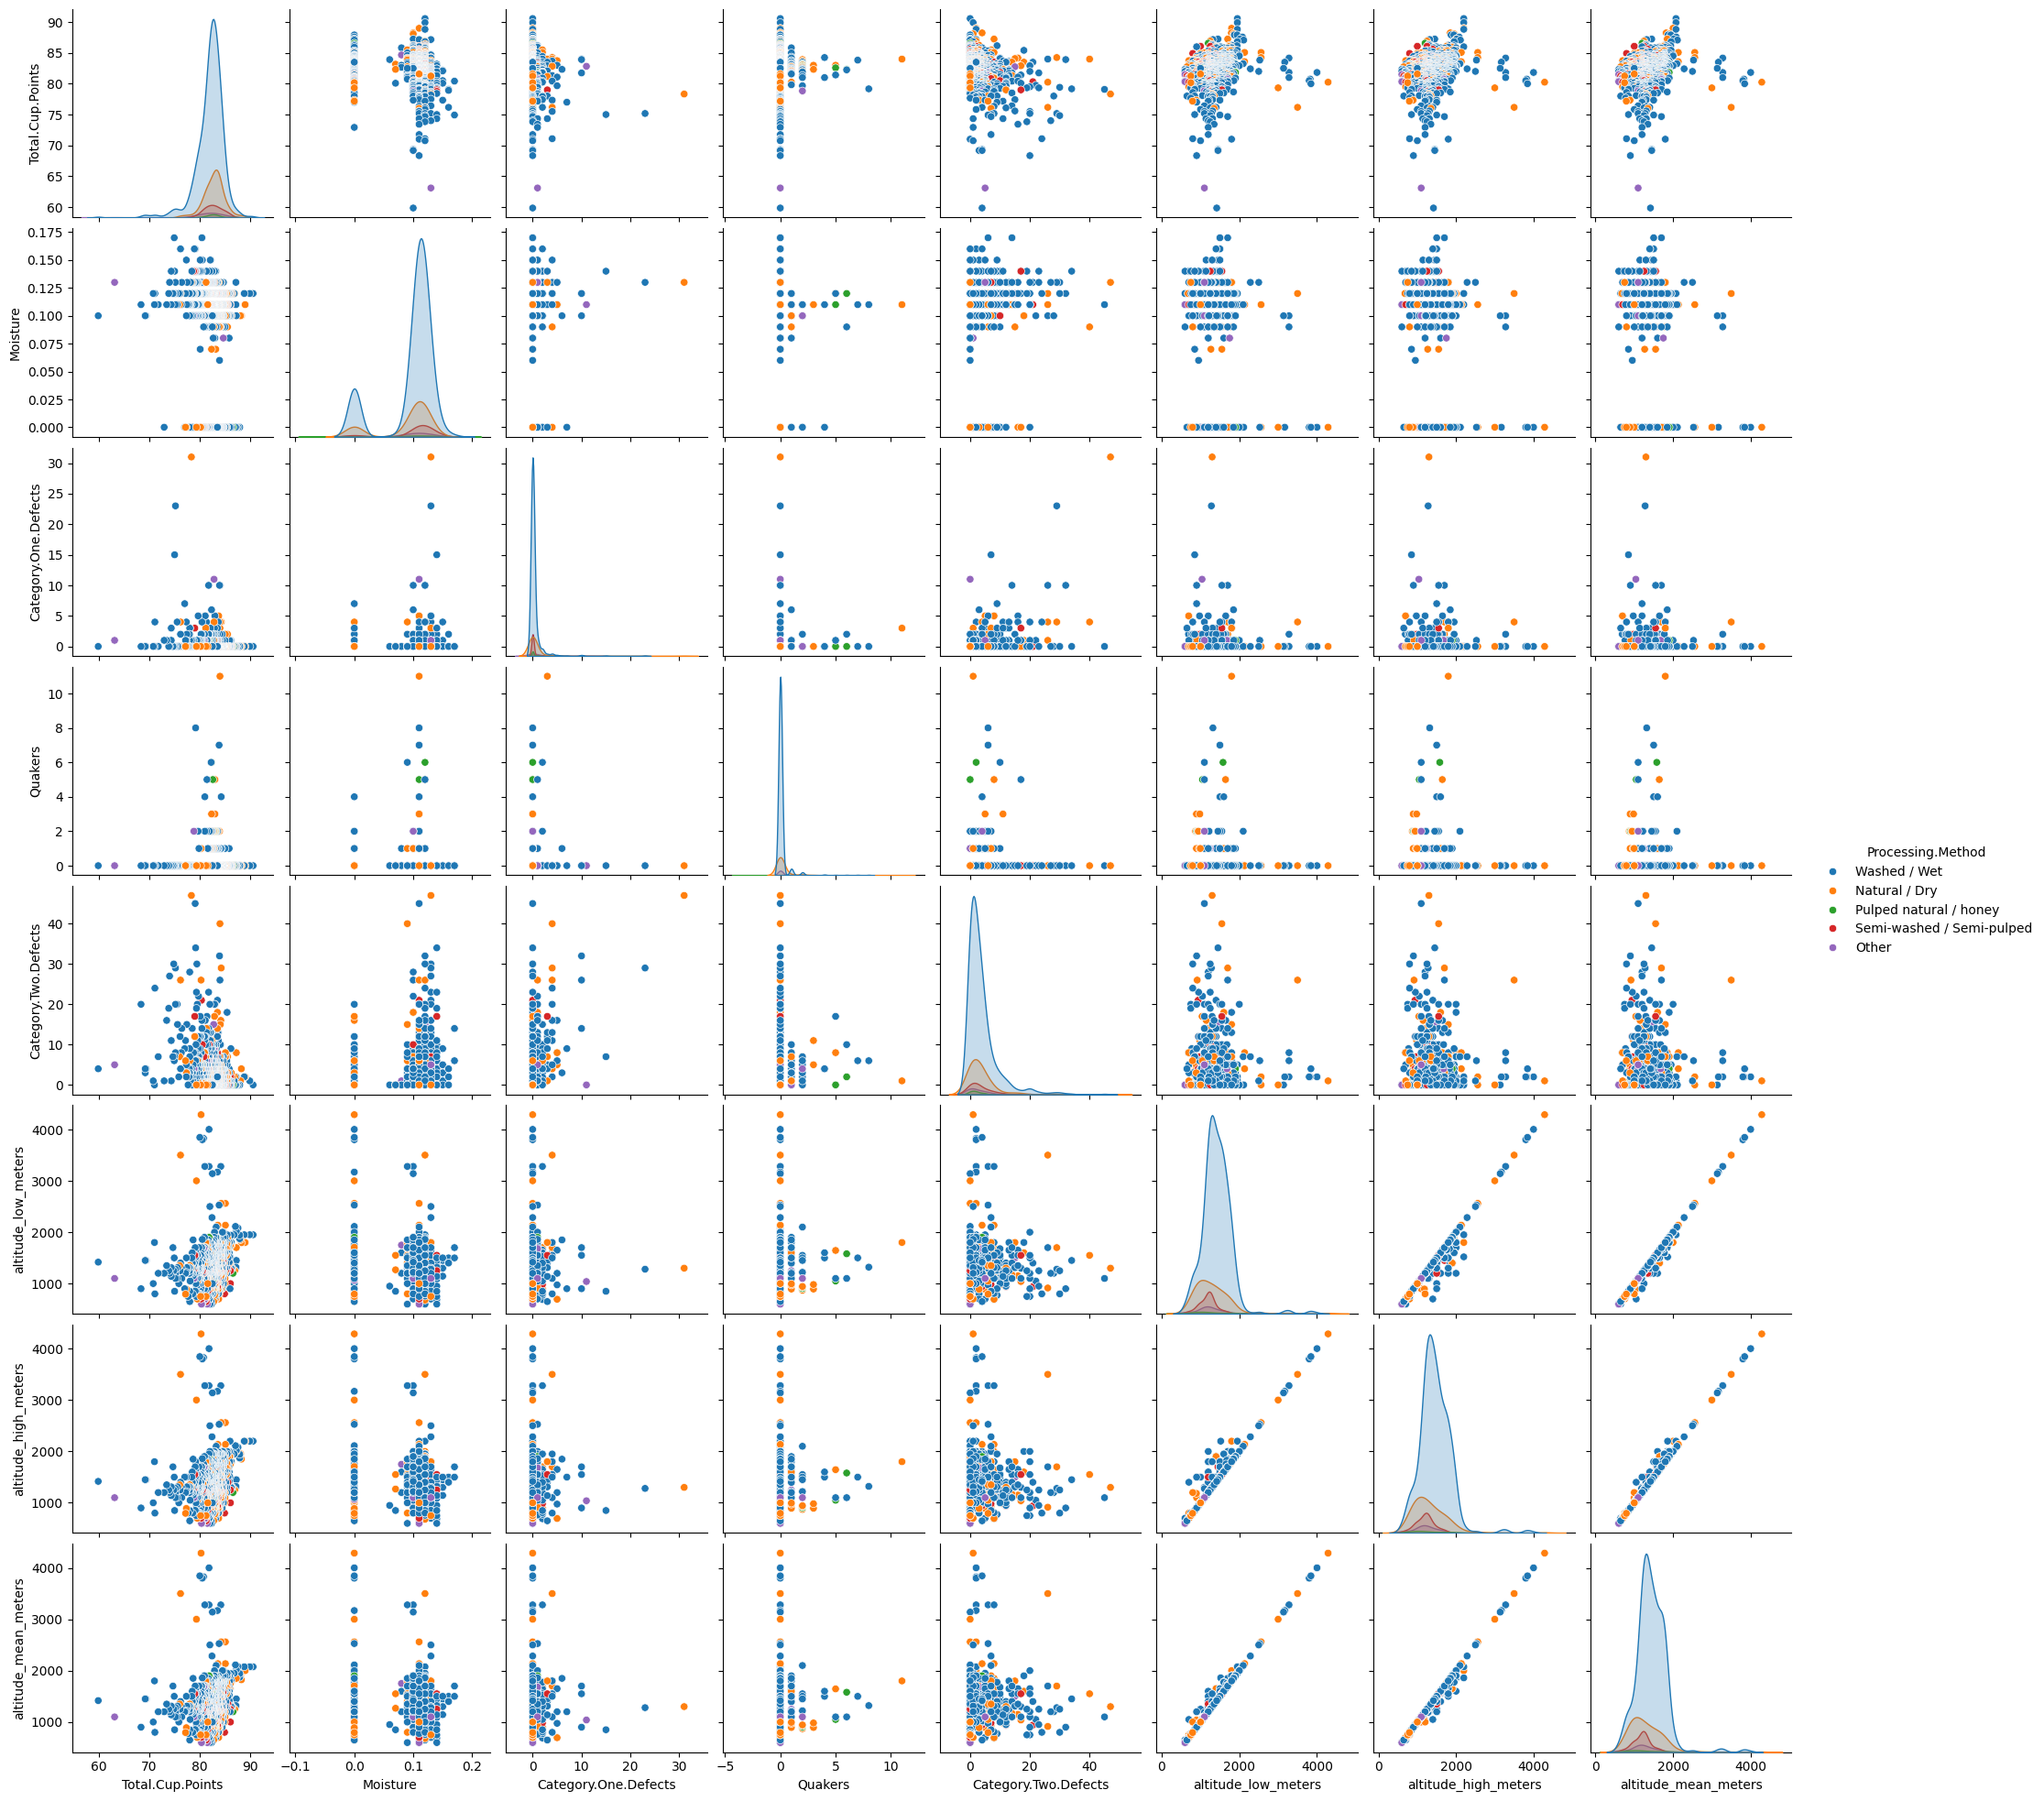

In [ ]:
seaborn.pairplot(data = df, hue = "Processing.Method")

# Models

Firstly we one hot encoding because in dataset there is a text values.

In [ ]:
df_dmy= pd.get_dummies(df)
np.shape(df_dmy)

(946, 47)

Then we make sets with and without column with values we want to model.

In [ ]:
X = df_dmy.drop(columns = "Total.Cup.Points")
y = df_dmy["Total.Cup.Points"]
np.shape(X)

(946, 46)

Now we split it to train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1)

Then we use standard scaler for train and test sets.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## KNN

For KNN regressor we perfirm only validation curve to look for the best number of neighbours.

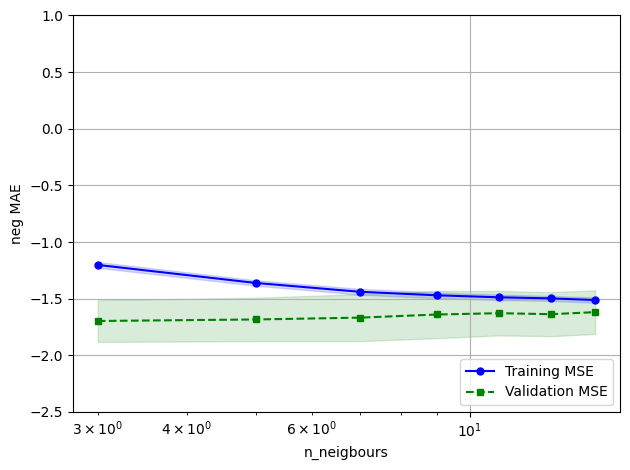

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knn_model= KNeighborsRegressor()
param_range = [3,5,7,9,11,13,15]
train_scores, test_scores = validation_curve(
                estimator=knn_model,
                X=X_train_std,
                y=y_train,
                param_name='n_neighbors',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MSE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MSE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_neigbours')
plt.ylabel('neg MAE')
plt.ylim([-2.5, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model= KNeighborsRegressor(n_neighbors = 7, # number of neighbors
                               p = 1) # manhattan_distance
knn_model.fit(X_train_std, y_train)

y_test_pred = knn_model.predict(X_test_std)
y_train_pred = knn_model.predict(X_train_std)

print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 1.420, test: 1.522
MSE train: 4.618, test: 4.566
R^2 train: 0.387, test: 0.049


## Tree

In Decision Tree firstly we check the curve and then perform Grid Search for the rest of hyperparameters.

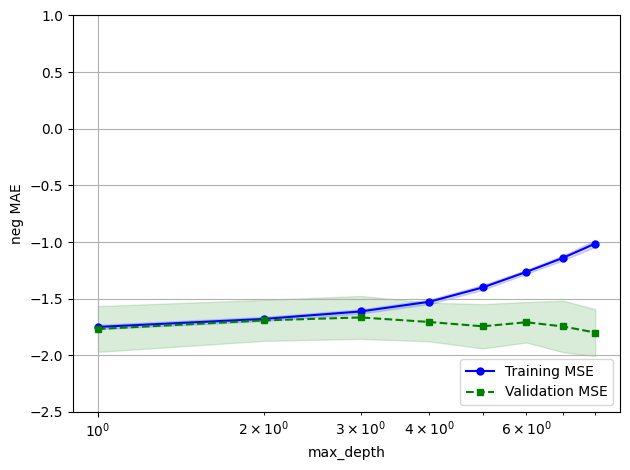

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_model= DecisionTreeRegressor()
param_range = [1,2,3,4,5,6,7,8]
train_scores, test_scores = validation_curve(
                estimator=tree_model,
                X=X_train_std,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MSE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MSE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('neg MAE')
plt.ylim([-2.5, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
param_grid = {
    "max_depth": [3,4,5,6,7],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": [1,2,3,4,5],
    "random_state": [1]
}

grid_model= GridSearchCV(estimator= tree_model, param_grid = param_grid)

grid_model.fit(X_train_std, y_train)
grid_model.best_params_

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'random_state': 1}

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

tree_model = DecisionTreeRegressor(criterion = 'absolute_error',
                                    max_depth = 6, # controls the maximum depth of the decision tree
                                    max_features = 4, # determines the maximum number of features to consider when looking for the best split
                                    min_samples_leaf = 3) #  specifies the minimum number of samples required to be at a leaf node
tree_model.fit(X_train_std, y_train)

y_test_pred = tree_model.predict(X_test_std)
y_train_pred = tree_model.predict(X_train_std)

print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 1.573, test: 1.480
MSE train: 6.426, test: 4.422
R^2 train: 0.147, test: 0.079


We can also check the importance of used features.

## Random Forest

For this method we will plot validation curve for nnumer of estimators and max depth. Then we perform grid search.

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
# param_range = [1,3,5,7,9,11] # max_depth
param_range = [20, 40, 60, 80, 100, 120, 140] # n_estimators
train_scores, test_scores = validation_curve(
                estimator=rf_model,
                X=X_train_std,
                y=y_train,
                param_name='n_estimators',
                #param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('neg MAE')
plt.ylim([-2.5, 1.0])
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
param_range = [1,3,5,7,9,11] # max_depth

train_scores, test_scores = validation_curve(
                estimator=rf_model,
                X=X_train_std,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('neg MAE')
plt.ylim([-2.5, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

param_grid= {
    "n_estimators": [60, 70, 80, 90, 100],
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [1,2,3]
}

grid_model= GridSearchCV(estimator = rf_model, param_grid = param_grid)

grid_model.fit(X_train_std, y_train)
grid_model.best_params_

{'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 90}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=90, # determines the number of decision trees in the forest
                               criterion='absolute_error', # specifies the function to measure the quality
                               n_jobs = -1,
                               min_samples_leaf = 3, # specifies the minimum number of samples required to be at a leaf node in each decision tree
                               max_depth = 6, # limits the maximum depth of each decision tree in the forest
                               random_state=1)

rf_model.fit(X_train_std, y_train)
y_train_pred = rf_model.predict(X_train_std)
y_test_pred = rf_model.predict(X_test_std)

# print(df.keys())
print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 1.363, test: 1.387
MSE train: 4.698, test: 3.707
R^2 train: 0.377, test: 0.228


We can also check feature importances.

In [ ]:
feature_names=columns[]
sorted_feature_importances = sorted(zip(feature_names, rf_model.feature_importances_), key=lambda x: x[1], reverse=True)

for feature, score in sorted_feature_importances:
    if score > 0:
        print(f'Feature: {feature}, Score: {score:.5f}')

SyntaxError: invalid syntax (<ipython-input-51-2c396feb81a5>, line 1)

We also check residual plot.

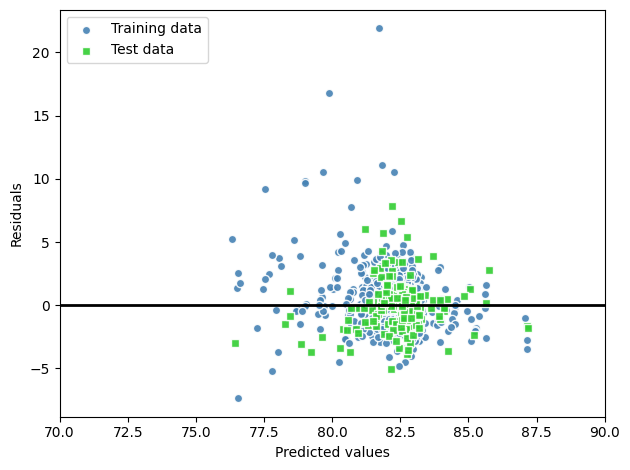

In [ ]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-100, xmax=500, lw=2, color='black')
plt.xlim([70, 90])
plt.tight_layout()

#plt.savefig('images/10_15.png', dpi=300)
plt.show()

## XGBoost

For XGBoost we make two validation curve and also grid search.

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

xgb_r = xgb.XGBRegressor()
param_range = [20, 40, 60, 80, 100, 125, 150, 200, 300, 400]
train_scores, test_scores = validation_curve(
                estimator=xgb_r,
                X=X_train,
                y=y_train,
                param_name='n_estimators',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")
                #scoring="r2")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('neg MAE')
plt.ylim([-2, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

xgb_r = xgb.XGBRegressor()
param_range = [0.001, 0.005, 0.01, 0.05, 0.1,]
train_scores, test_scores = validation_curve(
                estimator=xgb_r,
                X=X_train,
                y=y_train,
                param_name='learning_rate',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('learning_rate')
plt.ylabel('neg MAE')
plt.ylim([-2, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

xgb_r = xgb.XGBRegressor()
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(
                estimator=xgb_r,
                X=X_train,
                y=y_train,
                param_name='max_depth',
                param_range=param_range,
                cv=10,
                scoring="neg_mean_absolute_error")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training MAE')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation MAE')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('neg MAE')
plt.ylim([-2, 1.0])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

#xgb_r = xgb.XGBRegressor()

param_grid = {
    'booster': ['gbtree'],
    'objective': ['reg:absoluteerror'],
    "n_estimators": [20, 40, 60, 80, 100],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.005, 0.01, 0.015]
}

grid_model= GridSearchCV(estimator= xgb_r, param_grid= param_grid)

grid_model.fit(X_train, y_train)
grid_model.best_score_
grid_model.best_params_

In [ ]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(booster = 'gbtree',
                         objective = 'reg:absoluteerror',
                         n_estimators = 100, # determines the number of boosting rounds (i.e., the number of decision trees) to be built
                         max_depth = 6, # parameter controls the maximum depth of each decision tree
                         learning_rate = 0.015) # parameter scales the participation of each tree
                                                # it is used to decrease the feature weights with each boosting round, to make the boosting process more conservative

xgb_r.fit(X_train, y_train)

xgb_r.fit(X_train, y_train)
y_train_pred = xgb_r.predict(X_train)
y_test_pred = xgb_r.predict(X_test)

print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Now we check importances and make residuals plot.

In [ ]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-100, xmax=500, lw=2, color='black')
plt.xlim([75, 90])
plt.tight_layout()

plt.show()

## Neural Network

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(756, 46) (756,)
(190, 46) (190,)


In [ ]:
# I want to obtain validation set for checking evaluation of my neural network
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train_nn = sc.fit_transform(X_train_nn)
X_valid_nn = sc.transform(X_valid_nn)
X_test_nn = sc.transform(X_test_std)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(np.shape(X_train_nn), np.shape(y_train_nn))
print(np.shape(X_valid_nn), np.shape(y_valid_nn))

(604, 46) (604,)
(152, 46) (152,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    BatchNormalization,

)
from tensorflow.keras import regularizers

In [ ]:
tf.random.set_seed(1)

model = Sequential()
model.add(Dense(units=46, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=46, activation="relu"))
for i in range(5):
  model.add(Dense(units=92, activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dense(units=92, activation="relu"))
model.add(Dense(units=92, activation="relu"))
model.add(Dense(units=46, activation="relu"))
model.add(Dense(units=1))

model.compile(loss="MAE", metrics=["MAE"], optimizer='adam')

In [ ]:
# model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
tf.random.set_seed(1)
model.fit(X_train_std, y_train,
          epochs=100, # parameter specifies the number of times the entire dataset will be passed through the neural network during training
          verbose=1,
          batch_size=32, # parameter specifies the number of samples that will be propagated through the network at once before updating the model's weights
          # callbacks=EarlyStopping(monitor='val_loss',patience=10),
          validation_data=(X_valid_nn, y_valid_nn))

Epoch 1/100
24/24 [==============================] - 8s 19ms/step - loss: 70.4975 - MAE: 70.4975 - val_loss: 39.1178 - val_MAE: 39.1178
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 30.1002 - MAE: 30.1002 - val_loss: 48.3757 - val_MAE: 48.3757
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 25.9530 - MAE: 25.9530 - val_loss: 54.4696 - val_MAE: 54.4696
Epoch 4/100
24/24 [==============================] - 0s 7ms/step - loss: 21.6082 - MAE: 21.6082 - val_loss: 57.8898 - val_MAE: 57.8898
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 18.9575 - MAE: 18.9575 - val_loss: 55.6529 - val_MAE: 55.6529
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 19.1960 - MAE: 19.1960 - val_loss: 59.3568 - val_MAE: 59.3568
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 19.1771 - MAE: 19.1771 - val_loss: 56.0706 - val_MAE: 56.0706
Epoch 8/100
24/24 [==============================] - 0

In [ ]:
y_train_pred = model.predict(X_train_std, verbose=0)
y_test_pred = model.predict(X_test_nn, verbose=0)

print('MAE train: %.3f, test: %.3f' % (
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred)))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MAE train: 13.606, test: 13.843
MSE train: 191.646, test: 196.312
R^2 train: -24.429, test: -39.898


# Summary

In the project I must have handled with several problems like lack of data, missing values or outliers. However after preparing the dataset and choosing proper features I obtained well working models. Feature selection was not easy because there was a lot of categorical data. I must have found golden mean between numbers of features and well working model. For my problem I chose mean absolute error as the most important measure. Therefore now we can make a conclusion and choose the best model.

The best outcomes was for XGBoost:
* MAE train: 1.356, test: 1.356
* MSE train: 5.293, test: 3.700
* R^2 train: 0.298, test: 0.229

The second was Random Forest:
* MAE train: 1.303, test: 1.388,
* MSE train: 4.164, test: 3.690,
* R^2 train: 0.447, test: 0.231.


Then there is Decision tree:
* MAE train: 1.571, test: 1.497
* MSE train: 6.273, test: 4.651
* R^2 train: 0.168, test: 0.031

For K Nearest Neighbours I obtain MAE = 1.522 that made it the worst of those four.

Except for above I performed Neural Network. MAE for it was between 1.4 and 1.8. Probably it may work well for better architecture.


Let's make some analysis for XGBoost. For this regressor it came up that three the most important features are:
* Category.Two.Defects, Score: 0.05622
* Category.One.Defects, Score: 0.02148
* Species, Score: 0.01932

We see that numerical variables that describing coffee defects are most valuable for model. This makes sense because the more defects the fewer points coffee may have. Interestingly, the third most important feature is Species, which only takes values Arabica or Robusta.